In [104]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [105]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()
evds=evdsAPI(key)


In [106]:
import yfinance as yf 


In [107]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.326300
1,02-02-2006,1.324100
2,03-02-2006,1.327700
3,06-02-2006,1.325700
4,07-02-2006,1.329600
...,...,...
4748,15-04-2024,32.063600
4749,16-04-2024,32.385400
4750,17-04-2024,32.463200
4751,18-04-2024,32.521100


In [108]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()
usd



,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448


In [109]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02
216,2024-2,2073.88


In [110]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [111]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02
216,2024-2,2073.88


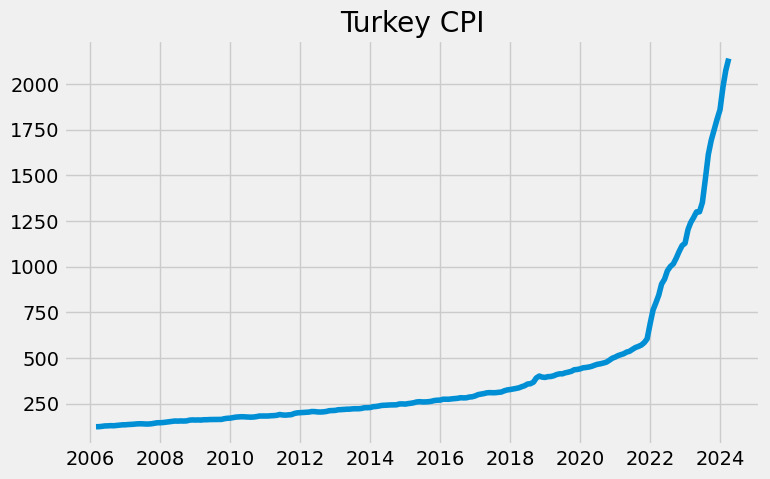

In [112]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [113]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448


In [114]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change(1)*100
money=money.dropna()
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-12-31,4.333376
2024-01-31,0.992308
2024-02-29,1.467195


In [115]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3

,M3
Tarih,
2006-01-06,2.644879e+08
2006-01-13,2.650229e+08
2006-01-20,2.594222e+08
2006-01-27,2.605798e+08
2006-02-03,2.600928e+08
...,...
2024-03-15,1.489715e+10
2024-03-22,1.501769e+10
2024-03-29,1.492717e+10


In [116]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2023-12-31,4.417846
2024-01-31,1.119951
2024-02-29,2.359600


In [117]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-10-31,8.6
2023-11-30,9.0
2023-12-31,8.8
2024-01-31,9.0


In [118]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-12-31,77.324000
2024-01-31,79.197143
2024-02-29,81.623999


In [119]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658


In [120]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658


In [121]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
pfaiz=pfaiz.dropna()
pfaiz


,Tarih,Faiz
59,2011-1,6.25
60,2011-2,6.25
61,2011-3,6.25
62,2011-4,6.25
63,2011-5,6.25
...,...,...
214,2023-12,42.50
215,2024-1,44.00
216,2024-2,45.00
217,2024-3,51.22


In [122]:
dates=pd.date_range('2011-01-31',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2011-01-31,6.25
2011-02-28,6.25
2011-03-31,6.25
2011-04-30,6.25
2011-05-31,6.25
...,...
2023-12-31,42.50
2024-01-31,44.00
2024-02-29,45.00


In [123]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-12-31,58.16
2024-01-31,59.41
2024-02-29,59.02
2024-03-31,78.70


In [124]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000
2024-02-29,42.530000


In [125]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="01-01-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2011-01-31",periods=len(mfaiz),freq="M"))
mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2011-01-31,8.0050
2011-02-28,8.0250
2011-03-31,8.1775
2011-04-30,8.4200
2011-05-31,8.9225
...,...
2023-12-31,51.4180
2024-01-31,50.4825
2024-02-29,51.4600
2024-03-31,57.2720


In [126]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-12-31,3.36
2024-01-31,3.50
2024-02-29,3.41
2024-03-31,3.98


In [127]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09


In [128]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-11-30,87.53
2023-12-31,86.48
2024-01-31,87.60
2024-02-29,89.44


In [129]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-11-30,55.31
2023-12-31,55.36
2024-01-31,57.22
2024-02-29,58.51


In [130]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["REDK"]=redk["REDK"].pct_change()*100
data["REDKT"]=redkt["REDKT"].pct_change()*100
data

,USD/TL,Motorin,Borç,TÜFE,M3,REDK,REDKT
Tarih,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,1.177123,0.274548,2.204708,NaN,NaN
2006-04-30,NaN,2.898551,-0.027189,1.336769,2.711175,NaN,NaN
2006-05-31,2.353679,4.694836,0.123397,1.875397,1.323922,NaN,NaN
2006-06-30,6.483947,5.829596,1.649207,0.335413,9.308200,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-31,2.498315,-3.343949,4.034830,2.927207,2.464258,-1.199589,0.090400
2024-01-31,2.580279,8.319605,3.978186,6.703310,4.417846,1.295097,3.359827
2024-02-29,2.418218,7.807351,4.898301,4.529188,1.119951,2.100457,2.254456


In [131]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin', 'Kredi Faizi','M3','Zam', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','TÜFE']]
data.iloc[11:23,4]=411
data.iloc[23:35,4]=490
data.iloc[35:47,4]=537
data.iloc[47:59,4]=587
data.iloc[59:71,4]=645
data.iloc[71:83,4]=720
data.iloc[83:95,4]=785
data.iloc[95:107,4]=870
data.iloc[107:119,4]=975
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:215,4]=11402.32
data.iloc[215:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.iloc[95:-1]
data.iloc[-1,-3]=8.7
data

,USD/TL,Motorin,Kredi Faizi,M3,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
Tarih,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,13.80,3.413428,10.828025,0.82,3.375162,-0.584687,2.669930,9.0220,-3.691204,-5.094658,9.2,9.96,1.978080
2014-02-28,3.033477,1.685899,15.54,1.958423,0.000000,0.73,1.804994,0.808574,1.876850,10.6275,2.179150,0.919060,9.5,10.23,0.428192
2014-03-31,2.465778,-2.278097,16.05,0.229599,0.000000,0.80,0.451349,0.193691,0.822203,11.3125,0.471546,0.641623,9.5,10.27,1.125608
2014-04-30,-1.344724,-6.214384,15.65,0.730196,0.000000,0.73,0.796760,0.478162,-0.154556,11.0200,4.682667,5.892031,9.7,10.03,1.344970
2014-05-31,-1.859714,-0.561578,15.36,-0.093468,0.000000,0.80,-0.362357,0.091080,0.146305,10.4940,1.283880,2.058652,9.7,9.53,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,2.001541,-3.136247,58.61,3.374057,0.000000,4.49,3.356297,3.741984,2.499767,45.6675,-1.938158,-1.408200,9.0,41.09,3.281097
2023-12-31,2.498315,-3.343949,58.16,2.464258,0.000000,3.36,2.245991,4.034830,2.653509,51.4180,-1.199589,0.090400,8.8,42.50,2.927207
2024-01-31,2.580279,8.319605,59.41,4.417846,49.110006,3.50,4.333376,3.978186,2.531626,50.4825,1.295097,3.359827,9.0,44.00,6.703310


In [132]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin

,Politika Faizi
2024-01-31,44.000000
2024-02-29,45.000000
2024-03-31,51.220000
2024-04-30,52.540000
2024-05-31,55.113355
2024-06-30,57.123687
2024-07-31,58.789980
2024-08-31,60.171112
2024-09-30,61.315883
2024-10-31,62.264743


In [133]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(25,X=faiztahmin[4:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-03-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-03-31,57.272000
2024-04-30,66.665000
2024-05-31,70.608604
2024-06-30,70.106972
2024-07-31,74.219455
2024-08-31,77.522302
2024-09-30,79.075742
2024-10-31,81.736393
2024-11-30,84.392915
2024-12-31,86.430571


In [134]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [135]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-12-31,2231.258978
2024-01-31,2341.408383
2024-02-29,2481.908203
2024-03-31,2656.218779


In [136]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [137]:
faiztahmin.columns=["Faiz"]


In [138]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [139]:
exog=pfaiz["Politika Faizi"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [140]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [141]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-03-31,8.659166
2024-04-30,8.704710
2024-05-31,8.639009
2024-06-30,8.630268
2024-07-31,8.641423
2024-08-31,8.627232
2024-09-30,8.625745
2024-10-31,8.628641
2024-11-30,8.625783
2024-12-31,8.625720


In [142]:
from prophet import Prophet

In [143]:
import optuna


In [144]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [145]:
"""study.best_params"""

'study.best_params'

In [146]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.349638369822835,changepoint_range=0.9894193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:47 - cmdstanpy - INFO - Chain [1] start processing
17:03:47 - cmdstanpy - INFO - Chain [1] done processing


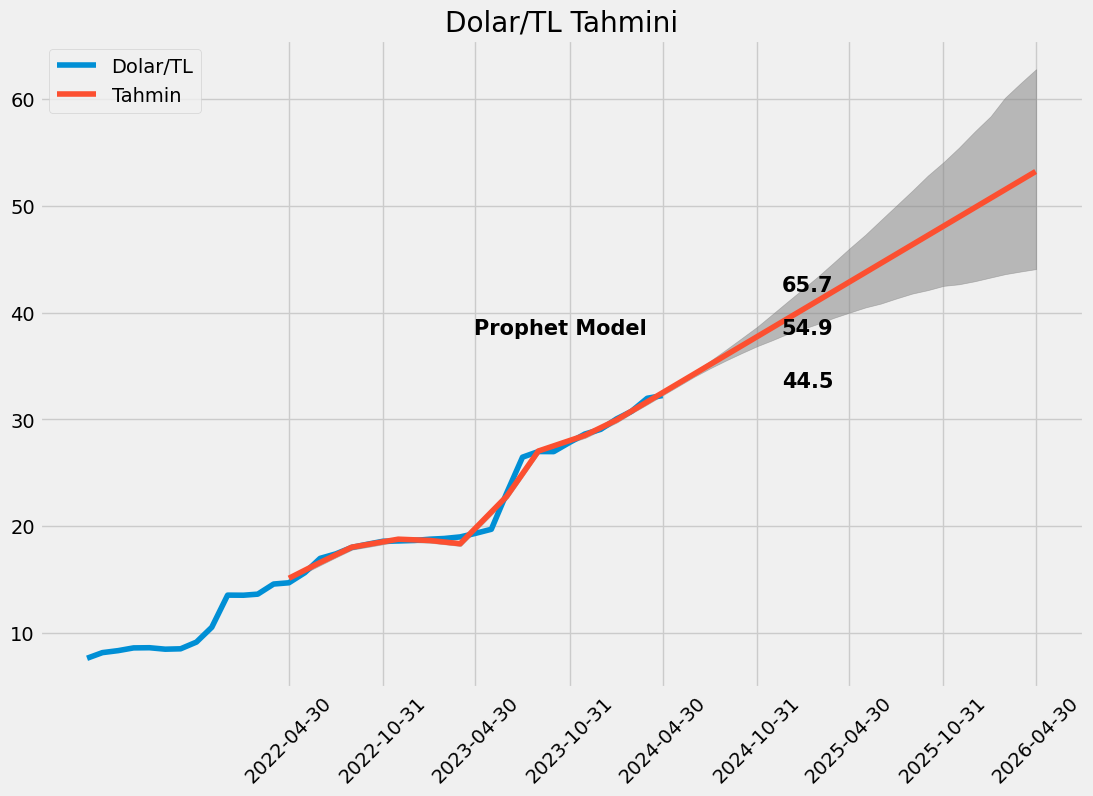

In [147]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [148]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-05-31    2.705810
2024-06-30    2.549540
2024-07-31    2.569027
2024-08-31    2.504681
2024-09-30    2.364657
2024-10-31    2.387034
2024-11-30    2.256177
2024-12-31    2.279944
2025-01-31    2.229121
2025-02-28    1.969497
2025-03-31    2.138399
2025-04-30    2.026092
2025-05-31    2.052052
2025-06-30    1.945926
2025-07-31    1.972408
2025-08-31    1.934257
2025-09-30    1.836342
2025-10-31    1.863336
2025-11-30    1.770243
2025-12-31    1.797432
2026-01-31    1.765695
2026-02-28    1.567150
2026-03-31    1.708288
2026-04-30    1.625415
2026-05-31    1.652732
2026-06-30    1.573413
Name: yhat, dtype: float64

In [149]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-11-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.241350
2024-05-31,33.113740
2024-06-30,33.957988
2024-07-31,34.830378
2024-08-31,35.702767


In [150]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [151]:
"""study.best_params"""

'study.best_params'

In [152]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:48 - cmdstanpy - INFO - Chain [1] start processing
17:03:49 - cmdstanpy - INFO - Chain [1] done processing


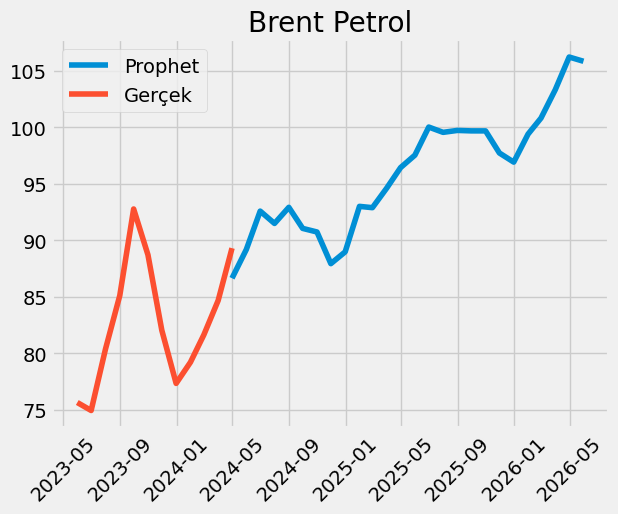

In [153]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [154]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-01-31     79.290320
2024-02-29     84.994689
2024-03-31     85.939818
2024-04-30     86.634445
2024-05-31     89.180867
2024-06-30     92.577175
2024-07-31     91.485603
2024-08-31     92.912168
2024-09-30     91.047658
2024-10-31     90.729716
2024-11-30     87.927267
2024-12-31     88.970058
2025-01-31     92.997833
2025-02-28     92.882464
2025-03-31     94.616437
2025-04-30     96.430719
2025-05-31     97.531973
2025-06-30    100.019926
2025-07-31     99.551238
2025-08-31     99.722201
2025-09-30     99.681692
2025-10-31     99.680141
2025-11-30     97.721883
2025-12-31     96.914538
2026-01-31     99.394401
2026-02-28    100.812563
2026-03-31    103.331263
2026-04-30    106.219357
2026-05-31    105.843810
Name: yhat, dtype: float64

In [155]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(fut

In [156]:
"""study.best_params"""

'study.best_params'

17:03:49 - cmdstanpy - INFO - Chain [1] start processing
17:03:50 - cmdstanpy - INFO - Chain [1] done processing


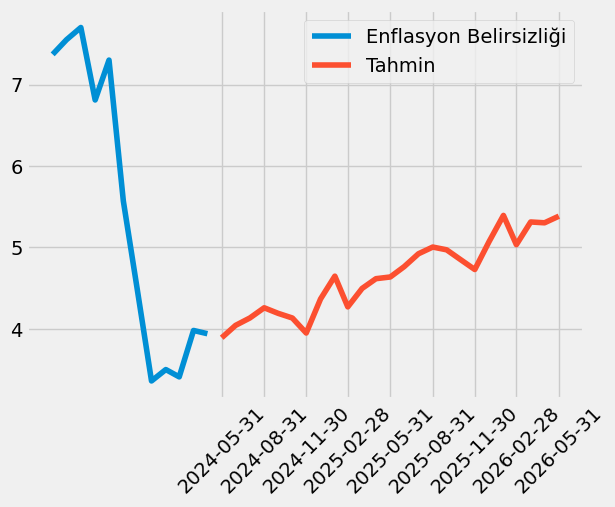

In [157]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=3.2891424441378785,changepoint_range=0.9994901336677199,seasonality_prior_scale=0.1653403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [158]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-04-30,3.940000
2024-05-31,3.890258
2024-06-30,4.042337
2024-07-31,4.133337
2024-08-31,4.258556
2024-09-30,4.190592
2024-10-31,4.132843
2024-11-30,3.948746
2024-12-31,4.366602


In [159]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [160]:
#study.best_params

In [161]:
((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-02-29,2.348118
2024-03-31,3.989978
2024-04-30,0.795977
2024-05-31,2.705810
2024-06-30,2.549540
2024-07-31,2.569027
2024-08-31,2.504681
2024-09-30,2.364657
2024-10-31,2.387034
2024-11-30,2.256177


In [162]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-02-29    7.194282
2024-03-31    1.111985
2024-04-30    0.808272
2024-05-31    2.939272
2024-06-30    3.808338
2024-07-31   -1.179095
2024-08-31    1.559333
2024-09-30   -2.006744
2024-10-31   -0.349204
2024-11-30   -3.088789
2024-12-31    1.185970
2025-01-31    4.527113
2025-02-28   -0.124055
2025-03-31    1.866847
2025-04-30    1.917512
2025-05-31    1.142016
2025-06-30    2.550910
2025-07-31   -0.468594
2025-08-31    0.171734
2025-09-30   -0.040622
2025-10-31   -0.001556
2025-11-30   -1.964541
2025-12-31   -0.826166
2026-01-31    2.558814
2026-02-28    1.426802
2026-03-31    2.498399
2026-04-30    2.794986
2026-05-31   -0.353558
Name: yhat, dtype: float64

In [163]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,-2.609922
2024-03-31,5.146331
2024-04-30,1.610683
2024-05-31,5.724613
2024-06-30,6.454973
2024-07-31,1.359641
2024-08-31,4.103070
2024-09-30,0.310461
2024-10-31,2.029494
2024-11-30,-0.902300


In [164]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [165]:
"""study.best_params"""

'study.best_params'

In [166]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.916034897796889,changepoint_range=0.9729543315216538,growth='linear',seasonality_prior_scale=4.453031163229546,n_changepoints=89,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:50 - cmdstanpy - INFO - Chain [1] start processing
17:03:51 - cmdstanpy - INFO - Chain [1] done processing


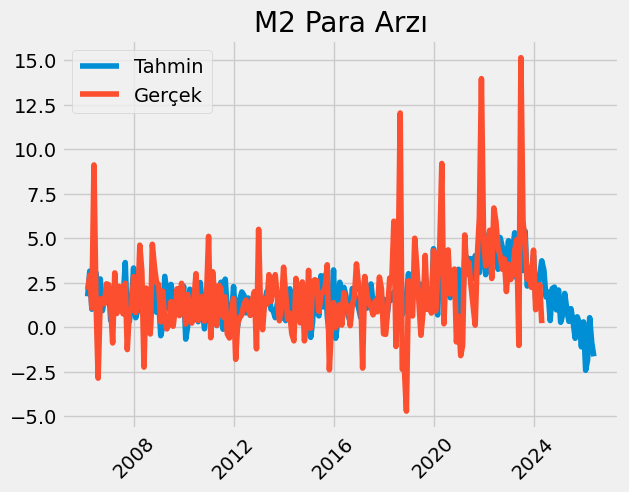

In [167]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [168]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-05-31    3.210644
2024-06-30    1.708587
2024-07-31    1.982665
2024-08-31    0.380977
2024-09-30    2.174297
2024-10-31    2.259620
2024-11-30    0.981791
2024-12-31    2.094617
2025-01-31    0.282926
2025-02-28    0.689203
2025-03-31    1.903785
2025-04-30    1.039381
2025-05-31    0.337429
2025-06-30    1.048895
2025-07-31    0.324612
2025-08-31   -0.617634
2025-09-30    0.590283
2025-10-31    0.245559
2025-11-30   -1.093193
2025-12-31    0.303861
2026-01-31   -2.414340
2026-02-28   -1.834919
2026-03-31    0.540477
2026-04-30   -0.853862
2026-05-31   -1.630616
Name: yhat, dtype: float64

In [169]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-05-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,0.234756
2024-05-31,3.210644
2024-06-30,1.708587
2024-07-31,1.982665
2024-08-31,0.380977
2024-09-30,2.174297
2024-10-31,2.259620


In [170]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [171]:
#study.best_params

In [172]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:51 - cmdstanpy - INFO - Chain [1] start processing
17:03:51 - cmdstanpy - INFO - Chain [1] done processing


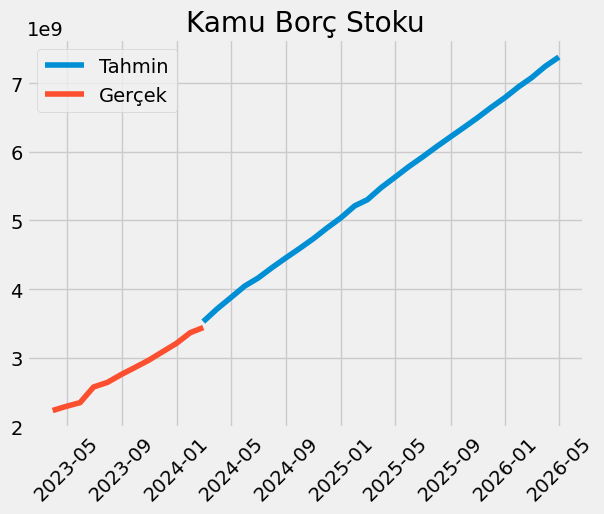

In [173]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [174]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-03-31    5.285398
2024-04-30    4.347335
2024-05-31    4.369817
2024-06-30    2.910647
2024-07-31    3.649570
2024-08-31    3.316311
2024-09-30    3.009125
2024-10-31    3.147249
2024-11-30    3.250372
2024-12-31    3.045848
2025-01-31    3.478122
2025-02-28    1.688249
2025-03-31    3.358298
2025-04-30    2.697592
2025-05-31    2.761882
2025-06-30    2.382242
2025-07-31    2.520512
2025-08-31    2.359111
2025-09-30    2.215116
2025-10-31    2.278621
2025-11-30    2.291082
2025-12-31    2.173380
2026-01-31    2.363509
2026-02-28    1.833938
2026-03-31    2.388195
2026-04-30    1.850094
Name: yhat, dtype: float64

In [175]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-03-28", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09
2024-02-29,3.440803e+09
2024-03-31,3.622663e+09
2024-04-30,3.780152e+09
2024-05-31,3.945338e+09
2024-06-30,4.060173e+09
2024-07-31,4.208352e+09
2024-08-31,4.347914e+09


In [176]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [177]:
"""study.best_params"""

'study.best_params'

In [178]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:52 - cmdstanpy - INFO - Chain [1] start processing
17:03:53 - cmdstanpy - INFO - Chain [1] done processing


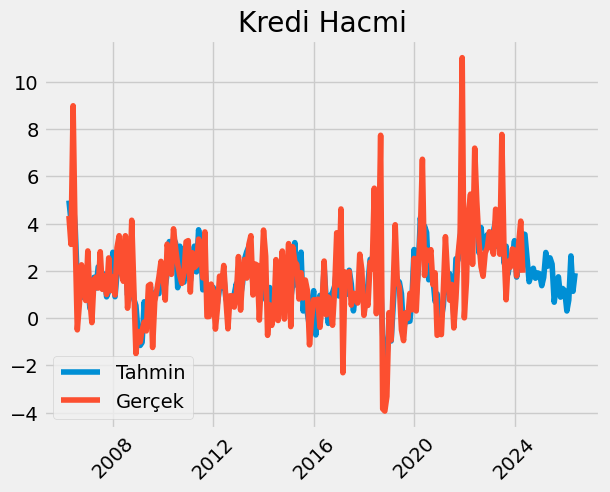

In [179]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [180]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-05-31    3.545908
2024-06-30    2.534705
2024-07-31    1.542438
2024-08-31    1.837284
2024-09-30    2.113879
2024-10-31    1.692131
2024-11-30    1.918522
2024-12-31    1.881104
2025-01-31    1.375844
2025-02-28    1.725531
2025-03-31    2.782921
2025-04-30    2.205905
2025-05-31    2.554277
2025-06-30    2.289390
2025-07-31    0.677168
2025-08-31    1.378434
2025-09-30    1.751391
2025-10-31    0.890595
2025-11-30    1.258023
2025-12-31    1.163543
2026-01-31    0.304902
2026-02-28    0.768374
2026-03-31    2.635610
2026-04-30    1.137752
2026-05-31    1.904927
Name: yhat, dtype: float64

In [181]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-05-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658
2024-04-30,1.922747
2024-05-31,3.545908
2024-06-30,2.534705
2024-07-31,1.542438
2024-08-31,1.837284
2024-09-30,2.113879
2024-10-31,1.692131


In [182]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"].index
    sn["y"]=m3["M3 Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"].index\n    sn["y"]=m3["M3 Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_ran

In [183]:
"""study.best_params"""

'study.best_params'

In [184]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=6.802652830514151,changepoint_range=0.9787110716126334,growth='linear',seasonality_prior_scale=5.79604715670266,n_changepoints=98,yearly_seasonality="auto",weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:53 - cmdstanpy - INFO - Chain [1] start processing
17:03:54 - cmdstanpy - INFO - Chain [1] done processing


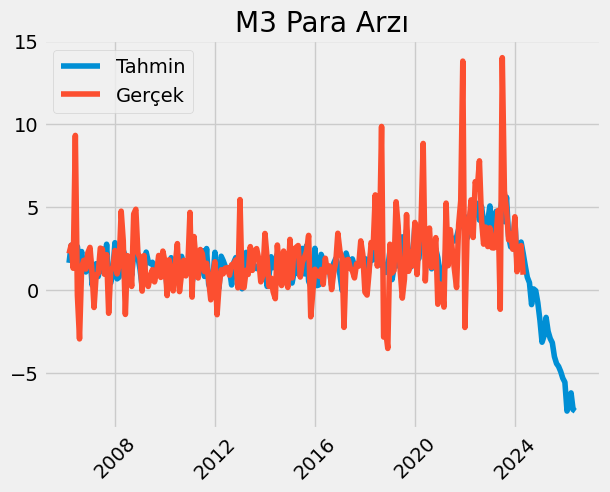

In [185]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(m3["M3"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [186]:
(predictions["yhat"].tail(25))

ds
2024-05-31    1.467316
2024-06-30    0.782659
2024-07-31    0.457274
2024-08-31   -0.862748
2024-09-30    0.081880
2024-10-31   -0.026735
2024-11-30   -0.739988
2024-12-31   -1.788737
2025-01-31   -3.122345
2025-02-28   -2.765052
2025-03-31   -1.629657
2025-04-30   -2.474222
2025-05-31   -2.904460
2025-06-30   -3.150239
2025-07-31   -3.987976
2025-08-31   -4.403111
2025-09-30   -4.579858
2025-10-31   -4.887764
2025-11-30   -5.282451
2025-12-31   -5.527807
2026-01-31   -7.260769
2026-02-28   -6.938287
2026-03-31   -6.167881
2026-04-30   -7.175100
2026-05-31   -7.263298
Name: yhat, dtype: float64

In [187]:
m3tahmin=(predictions["yhat"].tail(26))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-05-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-01-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-01-31,1.119951
2024-02-29,2.359600
2024-03-31,2.687835
2024-04-30,0.935095
2024-05-31,2.230650
2024-06-30,1.467316
2024-07-31,0.782659
2024-08-31,0.457274
2024-09-30,-0.862748
2024-10-31,0.081880


In [188]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [189]:
#study.best_params

In [190]:
redkt=redkt.pct_change()*100
redk=redk.pct_change()*100
redkt=redkt.dropna()
redk=redk.dropna()

In [191]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [192]:
#study.best_params

In [193]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].index
sn["y"]=redkt["REDKT"].values
prophet=Prophet(changepoint_prior_scale=9.989231798653107,
 changepoint_range=0.960887868185737,
 growth='linear',seasonality_prior_scale=2.612910619508741,n_changepoints=50,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:54 - cmdstanpy - INFO - Chain [1] start processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing


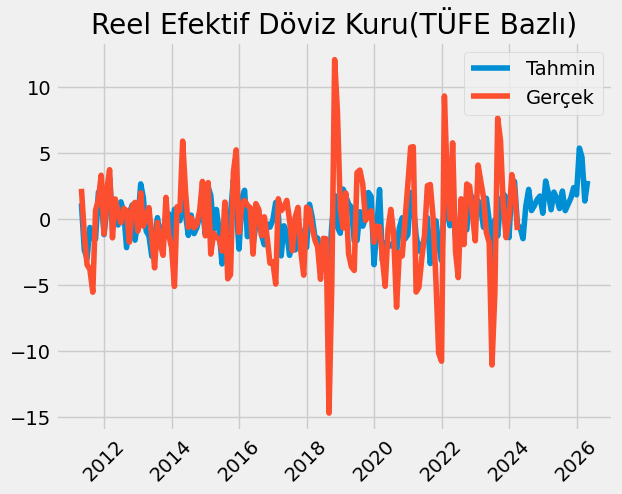

In [194]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [195]:
predictions["yhat"].tail(26)

ds
2024-03-31   -0.418822
2024-04-30   -0.669130
2024-05-31   -1.486454
2024-06-30    0.956468
2024-07-31    2.243914
2024-08-31    0.643143
2024-09-30    0.999985
2024-10-31    1.471411
2024-11-30    1.736421
2024-12-31    0.437801
2025-01-31    2.875081
2025-02-28    2.005878
2025-03-31    0.703707
2025-04-30    2.035990
2025-05-31    1.588710
2025-06-30    0.789237
2025-07-31    2.114116
2025-08-31    0.636185
2025-09-30    1.096027
2025-10-31    1.589498
2025-11-30    2.373763
2025-12-31    1.828052
2026-01-31    5.364542
2026-02-28    4.677135
2026-03-31    1.364651
2026-04-30    2.883870
Name: yhat, dtype: float64

In [196]:
redkttahmin=pd.DataFrame(predictions["yhat"].tail(25),index=predictions.index[-25:])
redkttahmin.columns=["REDKT"]
redkttahmin.index.name=""
redkttahmin

,REDKT
,
2024-04-30,-0.669130
2024-05-31,-1.486454
2024-06-30,0.956468
2024-07-31,2.243914
2024-08-31,0.643143
2024-09-30,0.999985
2024-10-31,1.471411
2024-11-30,1.736421
2024-12-31,0.437801


In [197]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=26,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].iloc[:-26])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redk["REDK"].index\n    sn["y"]=redk["REDK"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_

In [198]:
#study.best_params

In [199]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=9.940418274244966,changepoint_range=0.9610240851805488,growth='linear',seasonality_prior_scale=7.183346343813709,n_changepoints=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

17:03:55 - cmdstanpy - INFO - Chain [1] start processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing


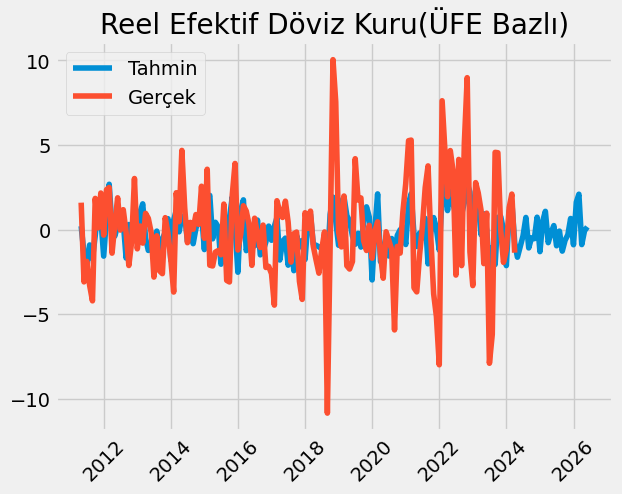

In [200]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [201]:
predictions["yhat"].tail(26)

ds
2024-04-30   -1.631858
2024-05-31   -0.994288
2024-06-30   -0.367443
2024-07-31    0.717971
2024-08-31   -1.083233
2024-09-30   -0.486992
2024-10-31   -0.537574
2024-11-30    0.733958
2024-12-31   -1.301467
2025-01-31    0.518899
2025-02-28    1.080736
2025-03-31   -0.771963
2025-04-30   -0.205307
2025-05-31    0.237460
2025-06-30   -0.956113
2025-07-31   -0.088046
2025-08-31   -1.271736
2025-09-30   -0.641924
2025-10-31   -0.300606
2025-11-30    0.657671
2025-12-31   -0.894286
2026-01-31    1.623520
2026-02-28    2.092476
2026-03-31   -0.886343
2026-04-30   -0.074701
2026-05-31    0.160583
Name: yhat, dtype: float64

In [202]:
redktahmin=predictions["yhat"].tail(26).values
redktahmin = np.array(redktahmin).reshape(-1, 1)
redktahmin = pd.DataFrame(redktahmin)
redktahmin.columns = ["REDK"]
redktahmin = redktahmin.set_index(pd.date_range(start="2024-04-28", periods=len(redktahmin), freq="1M"))
redktahmin

,REDK
2024-04-30,-1.631858
2024-05-31,-0.994288
2024-06-30,-0.367443
2024-07-31,0.717971
2024-08-31,-1.083233
2024-09-30,-0.486992
2024-10-31,-0.537574
2024-11-30,0.733958
2024-12-31,-1.301467
2025-01-31,0.518899


In [203]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [204]:
"""study.best_params"""

'study.best_params'

In [205]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin["REDKT"]
tahmindf["REDK"]=redktahmin["REDK"]
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi']
tahmindf=tahmindf.dropna()
tahmindf.iloc[0,1]=0.0
tahmindf=tahmindf.iloc[:14]










tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi
2024-04-30,2.357329,0.000000,0.0,3.940000,2.396667,2.687835,3.053888,66.665000,-0.669130,-1.631858,8.704710,52.540000
2024-05-31,2.478527,5.724613,0.0,3.890258,0.234756,0.935095,3.192438,70.608604,-1.486454,-0.994288,8.639009,55.113355
2024-06-30,2.025075,6.454973,0.0,4.042337,3.210644,2.230650,2.667787,70.106972,0.956468,-0.367443,8.630268,57.123687
2024-07-31,2.606935,1.359641,0.0,4.133337,1.708587,1.467316,2.541017,74.219455,2.243914,0.717971,8.641423,58.789980
2024-08-31,2.540701,4.103070,0.0,4.258556,1.982665,0.782659,1.971476,77.522302,0.643143,-1.083233,8.627232,60.171112
2024-09-30,2.477749,0.310461,0.0,4.190592,0.380977,0.457274,1.831200,79.075742,0.999985,-0.486992,8.625745,61.315883
2024-10-31,2.417841,2.029494,0.0,4.132843,2.174297,-0.862748,1.881098,81.736393,1.471411,-0.537574,8.628641,62.264743
2024-11-30,2.335101,-0.902300,0.0,3.948746,2.259620,0.081880,1.908177,84.392915,1.736421,0.733958,8.625783,63.051220
2024-12-31,2.306893,3.492953,0.0,4.366602,0.981791,-0.026735,1.830586,86.430571,0.437801,-1.301467,8.625720,63.703103
2025-01-31,2.254875,6.857148,30.0,4.646796,2.094617,-0.739988,1.725156,88.670185,2.875081,0.518899,8.626594,64.243425


In [206]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [207]:
data["TÜFE Lag"]=(df.pct_change()*100).shift(1).dropna()["CPI"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]

In [208]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [209]:
data=data.dropna()

In [210]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Kredi Faizi,M3,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,13.80,3.413428,10.828025,0.820000,3.375162,-0.584687,2.669930,9.022000,-3.691204,-5.094658,9.200000,9.960000,1.978080,0.460607
2014-02-28,3.033477,1.685899,15.54,1.958423,0.000000,0.730000,1.804994,0.808574,1.876850,10.627500,2.179150,0.919060,9.500000,10.230000,0.428192,1.978080
2014-03-31,2.465778,-2.278097,16.05,0.229599,0.000000,0.800000,0.451349,0.193691,0.822203,11.312500,0.471546,0.641623,9.500000,10.270000,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,15.65,0.730196,0.000000,0.730000,0.796760,0.478162,-0.154556,11.020000,4.682667,5.892031,9.700000,10.030000,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,15.36,-0.093468,0.000000,0.800000,-0.362357,0.091080,0.146305,10.494000,1.283880,2.058652,9.700000,9.530000,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31,2.254875,6.857148,NaN,-0.739988,30.000000,4.646796,2.094617,NaN,1.725156,88.670185,0.518899,2.875081,8.626594,64.243425,NaN,0.000000
2025-02-28,2.157214,1.842998,NaN,-1.788737,0.000000,4.269602,0.282926,NaN,1.660826,90.946516,1.080736,2.005878,8.626138,64.691279,NaN,0.000000
2025-03-31,2.111661,4.045166,NaN,-3.122345,0.000000,4.496006,0.689203,NaN,1.961432,93.005378,-0.771963,0.703707,8.626278,65.062490,NaN,0.000000
2025-04-30,2.045014,3.982455,NaN,-2.765052,0.000000,4.615653,1.903785,NaN,2.238119,95.062553,-0.205307,2.035990,8.626601,65.370173,NaN,0.000000


In [211]:
features=['USD/TL', 'Motorin', 'ParaArzi', 'Kredi', 'Mevduat Faizi', 'REDK', 'İşsizlik',
       'Politika Faizi',  'TÜFE Lag','TÜFE']
data1=data1[features]


In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,ParaArzi,Kredi,Mevduat Faizi,REDK,İşsizlik,Politika Faizi,TÜFE Lag,TÜFE
1,0.230960,-0.067225,-0.158873,0.057334,-0.604167,0.729859,-0.859611,-0.559543,0.128749,-0.640986
2,0.053410,-0.624773,-0.666458,-0.668545,-0.573089,0.167437,-0.859611,-0.557082,-0.569434,-0.333313
3,-1.138337,-1.178424,-0.536937,-1.340816,-0.586360,1.554425,-0.733374,-0.571847,-0.255267,-0.236539
4,-1.299402,-0.383339,-0.971579,-1.133744,-0.610224,0.434990,-0.733374,-0.602609,-0.156450,-0.655530
5,-1.213739,0.082400,-1.121111,-0.694890,-0.629120,-0.243014,-0.733374,-0.646290,-0.584285,-0.692779
...,...,...,...,...,...,...,...,...,...,...
132,-0.012550,0.660127,-0.050271,-0.047072,2.936559,0.183033,-1.410891,2.763523,-0.762323,NaN
133,-0.043094,-0.045128,-0.729613,-0.091348,3.039834,0.368082,-1.411178,2.791076,-0.762323,NaN
134,-0.057341,0.264613,-0.577268,0.115549,3.133242,-0.242130,-1.411090,2.813914,-0.762323,NaN
135,-0.078185,0.255793,-0.121828,0.305983,3.226575,-0.055494,-1.410886,2.832844,-0.762323,NaN


In [213]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [212]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    rlrate=trial.suggest_float('rlrate',0.01,0.5)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [240]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

[I 2024-04-06 22:20:35,310] A new study created in memory with name: no-name-249e56e8-f6ce-433c-b2a5-0d6b969801c1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:20:39,705] Trial 0 finished with value: 1.951497764289683 and parameters: {'learning_rate': 0.004163990005472451, 'units1': 123, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06387508846976026}. Best is trial 0 with value: 1.951497764289683.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2024-04-06 22:20:43,861] Trial 1 finished with value: 1.7269348995446963 and parameters: {'learning_rate': 0.008334904335022611, 'units1': 76, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08208469589082269}. Best is trial 1 with value: 1.7269348995446963.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2024-04-06 22:20:51,727] Trial 2 finished with value: 0.9609723440720114 and parameters: {'learning_rate': 0.001699831482502034, 'units1': 72, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.34446766947919893}. Best is trial 2 with value: 0.9609723440720114.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:20:55,094] Trial 3 finished with value: 1.5712306044003252 and parameters: {'learning_rate': 0.00915182643140821, 'units1': 112, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2815767588468734}. Best is trial 2 with value: 0.9609723440720114.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2024-04-06 22:21:01,234] Trial 4 finished with value: 0.9991168897625994 and parameters: {'learning_rate': 0.004502124912376484, 'units1': 46, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.17596403161389906}. Best is trial 2 with value: 0.9609723440720114.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-04-06 22:21:16,771] Trial 5 finished with value: 0.8052125754182707 and parameters: {'learning_rate': 0.001019359736587756, 'units1': 92, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.21783896942863737}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2024-04-06 22:21:20,043] Trial 6 finished with value: 1.2699337827143315 and parameters: {'learning_rate': 0.005893009599405812, 'units1': 97, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2753400777454551}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-04-06 22:21:23,728] Trial 7 finished with value: 1.3411075940109782 and parameters: {'learning_rate': 0.009044343478784304, 'units1': 23, 'batch_size': 30, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.3059231642229096}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[I 2024-04-06 22:21:38,358] Trial 8 finished with value: 1.144767561618335 and parameters: {'learning_rate': 0.0036885623905220234, 'units1': 94, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07308344748004224}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2024-04-06 22:21:41,111] Trial 9 finished with value: 1.6245243267100882 and parameters: {'learning_rate': 0.006864105073761512, 'units1': 87, 'batch_size': 35, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.40639441715220564}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


[I 2024-04-06 22:21:50,148] Trial 10 finished with value: 1.302740834527604 and parameters: {'learning_rate': 0.0009250040348320818, 'units1': 43, 'batch_size': 2, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1758781004447263}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:22:48,533] Trial 11 finished with value: 0.826549668494572 and parameters: {'learning_rate': 0.00021542290472724066, 'units1': 50, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.36111613350581934}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:22:56,262] Trial 12 finished with value: 0.9627454998053024 and parameters: {'learning_rate': 0.0022289204567503655, 'units1': 50, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.4782370687619623}. Best is trial 5 with value: 0.8052125754182707.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2024-04-06 22:24:00,348] Trial 13 finished with value: 0.7978485261374928 and parameters: {'learning_rate': 0.00021572544141992267, 'units1': 7, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.19091181310127137}. Best is trial 13 with value: 0.7978485261374928.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:24:21,330] Trial 14 finished with value: 0.6912495144792238 and parameters: {'learning_rate': 0.0029047709922965692, 'units1': 2, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19716350367168295}. Best is trial 14 with value: 0.6912495144792238.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:24:29,915] Trial 15 finished with value: 0.5665337014621165 and parameters: {'learning_rate': 0.0027403668196457377, 'units1': 4, 'batch_size': 9, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1541611377475497}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2024-04-06 22:24:36,678] Trial 16 finished with value: 0.8841985669916844 and parameters: {'learning_rate': 0.0025505849223779256, 'units1': 5, 'batch_size': 6, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.12752928348185696}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:24:42,501] Trial 17 finished with value: 1.638510967097793 and parameters: {'learning_rate': 0.0032615539461994907, 'units1': 25, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.014044643890145647}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:24:47,372] Trial 18 finished with value: 1.044431137000834 and parameters: {'learning_rate': 0.005699447378131586, 'units1': 18, 'batch_size': 13, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1284924664240104}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:24:51,478] Trial 19 finished with value: 0.8447750023469546 and parameters: {'learning_rate': 0.0030110653980449063, 'units1': 33, 'batch_size': 6, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2402811510209582}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:24:55,898] Trial 20 finished with value: 0.933552506003632 and parameters: {'learning_rate': 0.005062434029440512, 'units1': 11, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.11940157491979567}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:26:00,835] Trial 21 finished with value: 0.8515104136078148 and parameters: {'learning_rate': 0.0003034534259206065, 'units1': 1, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19727814287819107}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:26:11,053] Trial 22 finished with value: 0.6276421238286314 and parameters: {'learning_rate': 0.0016625489909615717, 'units1': 13, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.16162627194936222}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:26:18,235] Trial 23 finished with value: 0.8977880478208259 and parameters: {'learning_rate': 0.0019141694329832411, 'units1': 33, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.13581827656594958}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:26:27,178] Trial 24 finished with value: 0.6692239376278338 and parameters: {'learning_rate': 0.0014067793427298735, 'units1': 15, 'batch_size': 12, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.15664997887653584}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:26:35,965] Trial 25 finished with value: 3.389604254004592 and parameters: {'learning_rate': 0.0013864702641296414, 'units1': 15, 'batch_size': 2, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.033713286282866115}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:26:43,892] Trial 26 finished with value: 1.1321332295866458 and parameters: {'learning_rate': 0.002228022672844126, 'units1': 34, 'batch_size': 40, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.16047037292862257}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:26:49,828] Trial 27 finished with value: 0.9051758004241388 and parameters: {'learning_rate': 0.0036218321469655007, 'units1': 58, 'batch_size': 12, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.0831071171432715}. Best is trial 15 with value: 0.5665337014621165.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:26:59,832] Trial 28 finished with value: 0.44515273816340417 and parameters: {'learning_rate': 0.0011143679645262568, 'units1': 25, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.23766329122669455}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:27:03,876] Trial 29 finished with value: 0.7370927383422061 and parameters: {'learning_rate': 0.004203466865019, 'units1': 23, 'batch_size': 9, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.24049117452187854}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:27:12,445] Trial 30 finished with value: 0.761925534897541 and parameters: {'learning_rate': 0.0008437807629265567, 'units1': 128, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.308915927787409}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:27:20,779] Trial 31 finished with value: 0.5995421173787033 and parameters: {'learning_rate': 0.001624750181203617, 'units1': 13, 'batch_size': 13, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.22710451648541785}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:27:26,139] Trial 32 finished with value: 0.5511429431735554 and parameters: {'learning_rate': 0.0025229949849958568, 'units1': 30, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21985151959053567}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:27:31,670] Trial 33 finished with value: 0.6936606973301543 and parameters: {'learning_rate': 0.0026067148075843535, 'units1': 29, 'batch_size': 13, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2220654662815043}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:27:36,274] Trial 34 finished with value: 0.9638867406959349 and parameters: {'learning_rate': 0.0035081776766987087, 'units1': 65, 'batch_size': 6, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2534701024302302}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:27:40,129] Trial 35 finished with value: 1.187302055067528 and parameters: {'learning_rate': 0.007180781504445178, 'units1': 40, 'batch_size': 21, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2751207515042042}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:27:54,463] Trial 36 finished with value: 0.7405150081242815 and parameters: {'learning_rate': 0.0007694792644110642, 'units1': 21, 'batch_size': 29, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.3325055766361811}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:28:01,427] Trial 37 finished with value: 0.8274321142078259 and parameters: {'learning_rate': 0.00474085853859411, 'units1': 9, 'batch_size': 23, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21517216761642038}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2024-04-06 22:28:09,082] Trial 38 finished with value: 0.8933130582842659 and parameters: {'learning_rate': 0.0017466336616605853, 'units1': 109, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.09868843975133021}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2024-04-06 22:28:12,558] Trial 39 finished with value: 1.0508844252844627 and parameters: {'learning_rate': 0.0040907794047497035, 'units1': 39, 'batch_size': 26, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2924543185919755}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2024-04-06 22:28:16,792] Trial 40 finished with value: 1.1921643119754537 and parameters: {'learning_rate': 0.0023022838182360414, 'units1': 74, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.380750288667883}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:28:28,110] Trial 41 finished with value: 0.5975906298470278 and parameters: {'learning_rate': 0.001394605363035034, 'units1': 15, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.16258405095755574}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:28:36,395] Trial 42 finished with value: 0.6243165091488687 and parameters: {'learning_rate': 0.0013358279438321948, 'units1': 28, 'batch_size': 11, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.221610415158623}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:28:49,547] Trial 43 finished with value: 0.6807611322027155 and parameters: {'learning_rate': 0.0007832418703876074, 'units1': 16, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.26782366177402944}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:28:56,818] Trial 44 finished with value: 0.6039627916422606 and parameters: {'learning_rate': 0.002961264606717899, 'units1': 8, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1829686087751144}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:29:25,147] Trial 45 finished with value: 0.8039465467544727 and parameters: {'learning_rate': 0.0004983064330731618, 'units1': 19, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2410732005820397}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:29:43,320] Trial 46 finished with value: 0.782590408720877 and parameters: {'learning_rate': 0.0019508986795494557, 'units1': 1, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21004217457049004}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:29:58,042] Trial 47 finished with value: 0.6019640895959114 and parameters: {'learning_rate': 0.0010812484699536423, 'units1': 52, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.16076601825894304}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:30:00,631] Trial 48 finished with value: 1.3139887628670213 and parameters: {'learning_rate': 0.009917602365475045, 'units1': 28, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.10425860984801956}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:30:07,793] Trial 49 finished with value: 0.6891077839665924 and parameters: {'learning_rate': 0.0026090042148779772, 'units1': 8, 'batch_size': 28, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.31769893939738925}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:30:18,323] Trial 50 finished with value: 0.8286546328963221 and parameters: {'learning_rate': 0.0012460840872346934, 'units1': 37, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.4802581887778543}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:31:22,675] Trial 51 finished with value: 0.677251141774656 and parameters: {'learning_rate': 0.00015050703245636987, 'units1': 56, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.143722988302738}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:31:59,753] Trial 52 finished with value: 1.9380687320864967 and parameters: {'learning_rate': 0.0020604835657684175, 'units1': 66, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.18269127468095683}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:32:11,967] Trial 53 finished with value: 0.8890074060269967 and parameters: {'learning_rate': 0.0011759877971998468, 'units1': 46, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.16921305218681662}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:33:01,466] Trial 54 finished with value: 2.1378016054435056 and parameters: {'learning_rate': 0.0005895452749997529, 'units1': 86, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.053250413990006545}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:34:05,603] Trial 55 finished with value: 1.7387139579531687 and parameters: {'learning_rate': 0.0017079676257981532, 'units1': 24, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2002252082324139}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2024-04-06 22:34:15,670] Trial 56 finished with value: 0.9068582132472196 and parameters: {'learning_rate': 0.0024419610167626493, 'units1': 52, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.14739202036979507}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:34:21,467] Trial 57 finished with value: 1.1399399399462182 and parameters: {'learning_rate': 0.0032401860041331616, 'units1': 5, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2602582564101386}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2024-04-06 22:34:28,128] Trial 58 finished with value: 0.8728253428767728 and parameters: {'learning_rate': 0.0015846573804939295, 'units1': 81, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2314653116303333}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:34:51,346] Trial 59 finished with value: 0.680390275338229 and parameters: {'learning_rate': 0.0009676408787486406, 'units1': 12, 'batch_size': 24, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.10959729825151988}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2024-04-06 22:34:56,387] Trial 60 finished with value: 0.7573149414423912 and parameters: {'learning_rate': 0.0028334335856933556, 'units1': 19, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.17539388664300226}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:35:06,994] Trial 61 finished with value: 0.7176501839654814 and parameters: {'learning_rate': 0.0028287882990997463, 'units1': 5, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.18907646693201316}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:35:12,304] Trial 62 finished with value: 0.6224946371985215 and parameters: {'learning_rate': 0.004017799390415404, 'units1': 11, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.20874891959508526}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:35:18,164] Trial 63 finished with value: 0.6893794035083557 and parameters: {'learning_rate': 0.0032103949677628257, 'units1': 29, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1533877492245882}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


[I 2024-04-06 22:35:26,868] Trial 64 finished with value: 0.7775377004710613 and parameters: {'learning_rate': 0.002020600414264899, 'units1': 15, 'batch_size': 12, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.12723107581301288}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:36:37,175] Trial 65 finished with value: 3.5388937955848125 and parameters: {'learning_rate': 6.293630512427175e-05, 'units1': 6, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.25078020218887953}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[I 2024-04-06 22:36:41,287] Trial 66 finished with value: 0.5618546466030515 and parameters: {'learning_rate': 0.005589454152642753, 'units1': 21, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.18541545758440567}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[I 2024-04-06 22:36:44,630] Trial 67 finished with value: 0.9184271523752489 and parameters: {'learning_rate': 0.00595672932432518, 'units1': 34, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.43725244041394995}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2024-04-06 22:36:50,304] Trial 68 finished with value: 1.3739407691485799 and parameters: {'learning_rate': 0.005730113046242867, 'units1': 43, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.16745419058892086}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2024-04-06 22:36:55,376] Trial 69 finished with value: 0.7895170438754704 and parameters: {'learning_rate': 0.005211714041012041, 'units1': 24, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.23078792897520306}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[I 2024-04-06 22:36:58,769] Trial 70 finished with value: 1.1610954660351163 and parameters: {'learning_rate': 0.006468112793365522, 'units1': 21, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.28741795445405466}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:37:02,774] Trial 71 finished with value: 0.7240618002171467 and parameters: {'learning_rate': 0.007250799892036348, 'units1': 10, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.18534428108729695}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:37:08,466] Trial 72 finished with value: 0.6647201700183771 and parameters: {'learning_rate': 0.004646480284493147, 'units1': 17, 'batch_size': 13, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19575749769179657}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[I 2024-04-06 22:37:18,821] Trial 73 finished with value: 0.6801347406718427 and parameters: {'learning_rate': 0.0016159641367815137, 'units1': 13, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.14756035082878913}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:37:29,458] Trial 74 finished with value: 0.6362708316420186 and parameters: {'learning_rate': 0.00114302785501625, 'units1': 31, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.20211472897300858}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[I 2024-04-06 22:37:38,243] Trial 75 finished with value: 0.6371207586260018 and parameters: {'learning_rate': 0.002345842321396473, 'units1': 4, 'batch_size': 15, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1731992867000803}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:37:43,869] Trial 76 finished with value: 1.046799714458554 and parameters: {'learning_rate': 0.0036942355010872283, 'units1': 25, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.0890357223617431}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2024-04-06 22:37:47,856] Trial 77 finished with value: 0.8918450065657115 and parameters: {'learning_rate': 0.00822964466946339, 'units1': 20, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.22906501717926145}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2024-04-06 22:37:55,233] Trial 78 finished with value: 1.3986517703507442 and parameters: {'learning_rate': 0.006200855696655432, 'units1': 8, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.11968566377004837}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2024-04-06 22:38:14,078] Trial 79 finished with value: 0.7016457144805607 and parameters: {'learning_rate': 0.005446372711244366, 'units1': 1, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1382947218040788}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:38:25,439] Trial 80 finished with value: 0.9319312304896735 and parameters: {'learning_rate': 0.0014830435251877638, 'units1': 61, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.21248803291651508}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:38:31,236] Trial 81 finished with value: 0.5988727561514063 and parameters: {'learning_rate': 0.0038394711835119566, 'units1': 12, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21140923696084055}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:38:38,180] Trial 82 finished with value: 0.5272545645948518 and parameters: {'learning_rate': 0.003023427143749245, 'units1': 15, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2429860416590859}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:38:41,906] Trial 83 finished with value: 0.5774576492377974 and parameters: {'learning_rate': 0.0044522504798887585, 'units1': 14, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.24323048656268523}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:38:46,566] Trial 84 finished with value: 0.6949562225084752 and parameters: {'learning_rate': 0.004245514130207274, 'units1': 14, 'batch_size': 21, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.24562263953913208}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:38:51,351] Trial 85 finished with value: 0.6971041932150585 and parameters: {'learning_rate': 0.004934856535705991, 'units1': 18, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2671451096108121}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:38:56,000] Trial 86 finished with value: 0.8251056046614359 and parameters: {'learning_rate': 0.003870591479067201, 'units1': 22, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2564357502721553}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:38:59,943] Trial 87 finished with value: 0.7503719513876779 and parameters: {'learning_rate': 0.004334423706128725, 'units1': 27, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2970731028958117}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:39:05,632] Trial 88 finished with value: 0.6149609205880635 and parameters: {'learning_rate': 0.0035194341856751633, 'units1': 12, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.22173572764204452}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:39:13,568] Trial 89 finished with value: 0.6488865389554587 and parameters: {'learning_rate': 0.002685873809031054, 'units1': 17, 'batch_size': 21, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.27307611274209}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2024-04-06 22:39:19,627] Trial 90 finished with value: 0.8236713696955 and parameters: {'learning_rate': 0.0031582996289357774, 'units1': 4, 'batch_size': 5, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.28001684251097153}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:39:29,086] Trial 91 finished with value: 0.5666147896884702 and parameters: {'learning_rate': 0.0021501440587680574, 'units1': 9, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2401489853788693}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2024-04-06 22:39:37,810] Trial 92 finished with value: 0.6413492579571455 and parameters: {'learning_rate': 0.002224325018144714, 'units1': 10, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.23801929320783738}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:39:45,795] Trial 93 finished with value: 0.9082279349344806 and parameters: {'learning_rate': 0.00376279713442164, 'units1': 15, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.20419438071293003}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2024-04-06 22:39:54,207] Trial 94 finished with value: 0.758989858130453 and parameters: {'learning_rate': 0.0018864657885306361, 'units1': 22, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.22164908728560442}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2024-04-06 22:39:59,069] Trial 95 finished with value: 1.121807693514645 and parameters: {'learning_rate': 0.002107427884574532, 'units1': 100, 'batch_size': 26, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2575435689498514}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2024-04-06 22:40:08,378] Trial 96 finished with value: 0.9936004717561232 and parameters: {'learning_rate': 0.003431948206016067, 'units1': 7, 'batch_size': 23, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2412165382787892}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:40:27,050] Trial 97 finished with value: 0.8756861856552528 and parameters: {'learning_rate': 0.0025132840362097307, 'units1': 3, 'batch_size': 18, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19341171045404798}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:40:31,129] Trial 98 finished with value: 0.719389947642072 and parameters: {'learning_rate': 0.004563084457622834, 'units1': 12, 'batch_size': 20, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21702582956672975}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2024-04-06 22:40:36,778] Trial 99 finished with value: 0.6628731615566803 and parameters: {'learning_rate': 0.0029661878122844224, 'units1': 25, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.22962059921101016}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2024-04-06 22:40:51,294] Trial 100 finished with value: 0.6144815447748703 and parameters: {'learning_rate': 0.0005634266516766648, 'units1': 32, 'batch_size': 7, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2635135903941357}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2024-04-06 22:41:31,282] Trial 101 finished with value: 1.3413671979391435 and parameters: {'learning_rate': 0.0017825393292014015, 'units1': 37, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.16097343503032338}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2024-04-06 22:41:45,058] Trial 102 finished with value: 0.5516716032212513 and parameters: {'learning_rate': 0.001092133089175171, 'units1': 17, 'batch_size': 19, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.18438141435543795}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2024-04-06 22:42:10,751] Trial 103 finished with value: 0.6066862429809082 and parameters: {'learning_rate': 0.00045047489926487824, 'units1': 17, 'batch_size': 16, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1827563068054887}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2024-04-06 22:42:21,382] Trial 104 finished with value: 0.5439456658005752 and parameters: {'learning_rate': 0.0014521501556094827, 'units1': 9, 'batch_size': 21, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.20751464412613024}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2024-04-06 22:42:36,343] Trial 105 finished with value: 0.5742655588423032 and parameters: {'learning_rate': 0.0013601471854717976, 'units1': 9, 'batch_size': 24, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21236977920341682}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2024-04-06 22:42:49,784] Trial 106 finished with value: 0.624548033800855 and parameters: {'learning_rate': 0.001336849728234629, 'units1': 9, 'batch_size': 25, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.2492980818702561}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2024-04-06 22:43:14,142] Trial 107 finished with value: 0.5704447476858979 and parameters: {'learning_rate': 0.0007232804962875926, 'units1': 20, 'batch_size': 23, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.17787971115912204}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:43:37,332] Trial 108 finished with value: 0.591930031080475 and parameters: {'learning_rate': 0.0007461085336044147, 'units1': 26, 'batch_size': 24, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19516956534028154}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2024-04-06 22:44:28,601] Trial 109 finished with value: 0.6093659093745115 and parameters: {'learning_rate': 0.0002464659619805295, 'units1': 20, 'batch_size': 25, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.23488721235686053}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:44:47,270] Trial 110 finished with value: 0.7066119255433688 and parameters: {'learning_rate': 0.0007431773143185523, 'units1': 30, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.17847773806148753}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2024-04-06 22:45:03,344] Trial 111 finished with value: 0.5722045225639293 and parameters: {'learning_rate': 0.0010419803680133774, 'units1': 27, 'batch_size': 24, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1910934105112101}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2024-04-06 22:45:32,515] Trial 112 finished with value: 0.88234381421743 and parameters: {'learning_rate': 0.0010015902836766515, 'units1': 7, 'batch_size': 23, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.203636496876103}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:45:46,446] Trial 113 finished with value: 0.6163471295621399 and parameters: {'learning_rate': 0.0011505930450565484, 'units1': 19, 'batch_size': 21, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.19210902292148546}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2024-04-06 22:46:01,326] Trial 114 finished with value: 0.7133920066353356 and parameters: {'learning_rate': 0.0009244182114402678, 'units1': 16, 'batch_size': 26, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.49843471316714105}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:46:14,520] Trial 115 finished with value: 0.7603900882120304 and parameters: {'learning_rate': 0.001446541289992932, 'units1': 22, 'batch_size': 28, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1701242358626148}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2024-04-06 22:46:23,316] Trial 116 finished with value: 0.9359267925125465 and parameters: {'learning_rate': 0.001817904520056337, 'units1': 69, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.1536143402690717}. Best is trial 28 with value: 0.44515273816340417.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2024-04-06 22:46:59,211] Trial 117 finished with value: 0.5977055729130353 and parameters: {'learning_rate': 0.00046672558690168445, 'units1': 10, 'batch_size': 24, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.21702664611417524}. Best is trial 28 with value: 0.44515273816340417.
[W 2024-04-06 22:46:59,518] Trial 118 failed with parameters: {'learning_rate': 0.0027561822947038414, 'units1': 14, 'batch_size': 31, 'activation1': 'selu', 'optimizer': 'rmsprop', 'rlrate': 0.20395652612056495} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_14540\537721611.py", line 36, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
  File

KeyboardInterrupt: 

In [317]:
study.best_params

{'learning_rate': 0.00011894837961664998,
 'units1': 54,
 'batch_size': 8,
 'activation1': 'selu',
 'optimizer': 'rmsprop',
 'rlrate': 0.01740104922653901}

In [207]:
study.best_params paraarzi

{'learning_rate': 0.006934591779259963,
 'units1': 19,
 'batch_size': 36,
 'activation1': 'tanh',
 'optimizer': 'rmsprop',
 'rlrate': 0.09835043804881806}

In [148]:
study.best_params m3

{'learning_rate': 0.0003203914175958463,
 'units1': 32,
 'batch_size': 4,
 'activation1': 'selu',
 'optimizer': 'rmsprop',
 'rlrate': 0.14070760785264688}

In [214]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','REDK','Politika Faizi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [215]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=19,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.09835043804881806)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.006934591779259963)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=36,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 1.8395 - mean_squared_error: 0.7107 - val_loss: 1.3031 - val_mean_squared_error: 0.3283
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.3586 - mean_squared_error: 0.4042 - val_loss: 1.0994 - val_mean_squared_error: 0.2468
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1702 - mean_squared_error: 0.3328 - val_loss: 0.9662 - val_mean_squared_error: 0.2104
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0435 - mean_squared_error: 0.3003 - val_loss: 0.8645 - val_mean_squared_error: 0.1910
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9448 - mean_squared_error: 0.2825 - val_loss: 0.7813 - val_mean_squared_error: 0.1800
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8626 - mean_squared_error: 0.2714 - val_loss: 0.7109 - val_mean_squared_error: 0.1738
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7917 - mean_squared_error: 0.2639 - val_loss: 0.6505 - v

In [157]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


0.6929203338394179

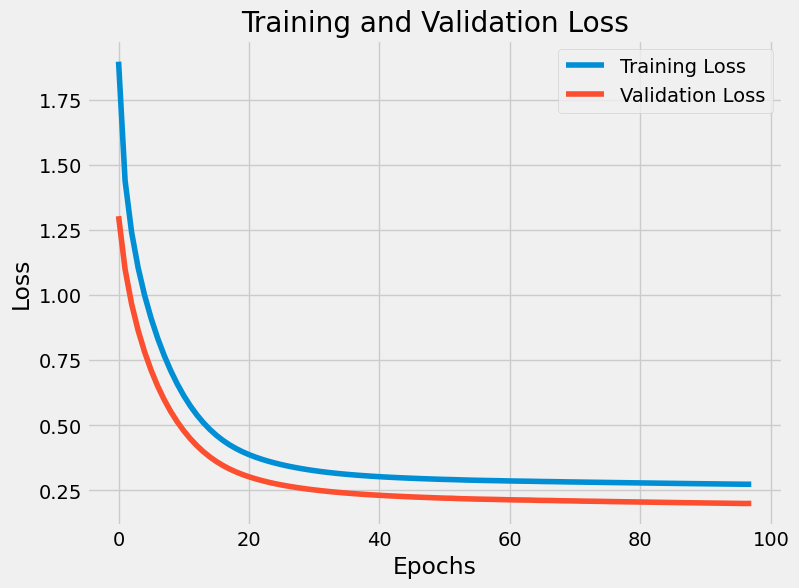

In [158]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [159]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.451562
2023-05-31,0.043076,-0.454533
2023-06-30,3.920498,3.285464
2023-07-31,9.488824,10.506888
2023-08-31,9.086793,9.337475
2023-09-30,4.753114,6.481764
2023-10-31,3.433981,3.446767
2023-11-30,3.281097,3.150116
2023-12-31,2.927207,2.861577
2024-01-31,6.703310,6.830000


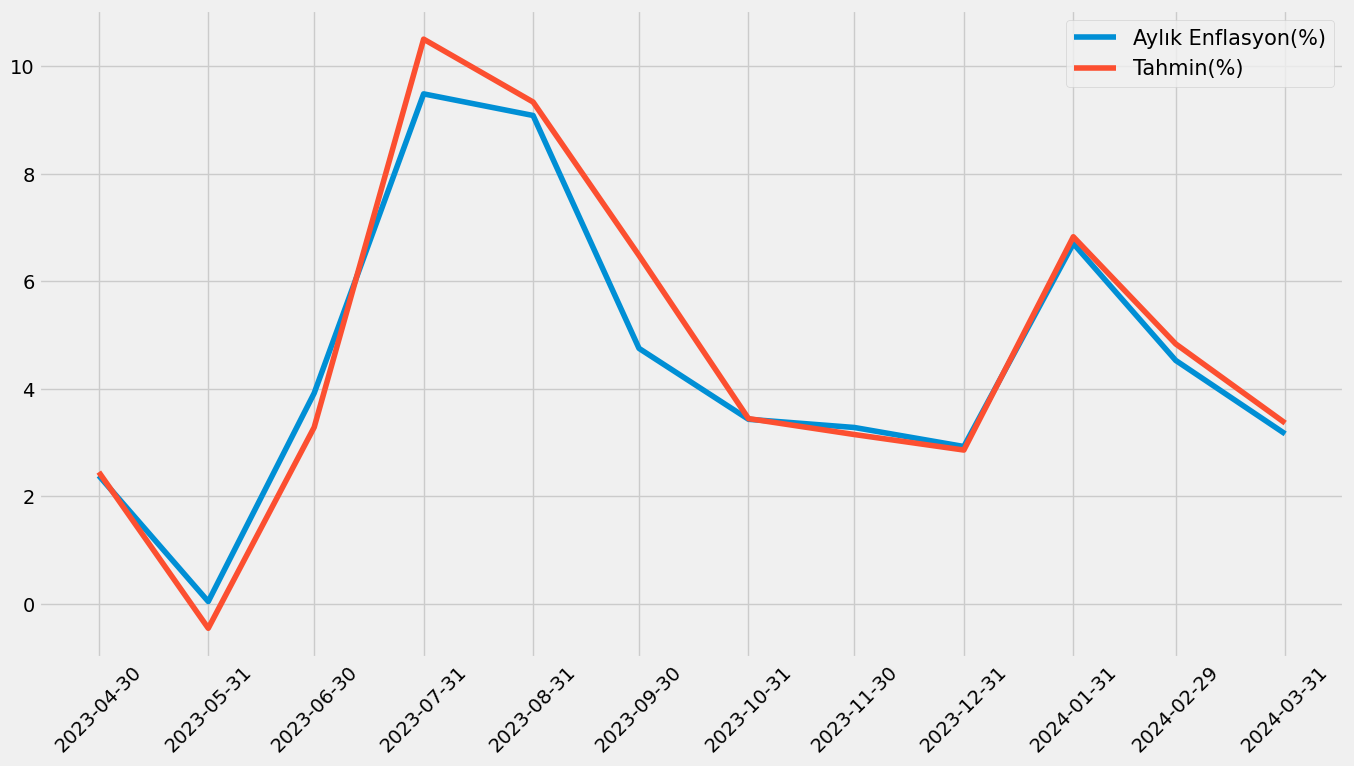

In [160]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [216]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


,TÜFE
2024-04-30,3.474236
2024-05-31,2.442721
2024-06-30,3.582428
2024-07-31,2.655212
2024-08-31,2.893106
2024-09-30,1.947575
2024-10-31,2.801783
2024-11-30,2.615732
2024-12-31,2.483048
2025-01-31,3.340298


In [217]:
tüfetahmin0 = []
result = df["CPI"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["NN"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,NN
2024-04-30,2213.800232
2024-05-31,2267.877203
2024-06-30,2349.122265
2024-07-31,2411.496434
2024-08-31,2481.263588
2024-09-30,2529.588053
2024-10-31,2600.461630
2024-11-30,2668.482735
2024-12-31,2734.742435
2025-01-31,2826.090980


In [218]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','REDK','Politika Faizi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=32,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.14070760785264688)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0003203914175958463)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=4,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2004 - mean_squared_error: 0.4230 - val_loss: 1.8879 - val_mean_squared_error: 0.1817
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0075 - mean_squared_error: 0.2889 - val_loss: 1.8007 - val_mean_squared_error: 0.1291
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9014 - mean_squared_error: 0.2315 - val_loss: 1.7378 - val_mean_squared_error: 0.1042
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8199 - mean_squared_error: 0.1996 - val_loss: 1.6866 - val_mean_squared_error: 0.0942
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7532 - mean_squared_error: 0.1832 - val_loss: 1.6402 - val_mean_squared_error: 0.0909
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6952 - mean_squared_error: 0.1754 - val_loss: 1.5954 - val_mean_squared_error: 0.0905
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6422 - mean_squared_error: 0.1719 - val_loss: 1.5

In [219]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


,TÜFE
2024-04-30,3.469622
2024-05-31,2.700857
2024-06-30,3.181312
2024-07-31,2.593771
2024-08-31,2.545213
2024-09-30,2.135615
2024-10-31,1.982576
2024-11-30,2.034655
2024-12-31,2.332503
2025-01-31,2.614099


In [220]:
tüfetahmin00 = []
result = df["CPI"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin00.append(result)

tüfetahmin00 = np.array(tüfetahmin00).reshape(-1, 1)
tüfetahmin00 = pd.DataFrame(tüfetahmin00)
tüfetahmin00.columns = ["NN"]
tüfetahmin00 = tüfetahmin00.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin00), freq="1M"))
tüfetahmin00

,NN
2024-04-30,2213.701520
2024-05-31,2273.490441
2024-06-30,2345.817262
2024-07-31,2406.662395
2024-08-31,2467.917078
2024-09-30,2520.622283
2024-10-31,2570.595523
2024-11-30,2622.898276
2024-12-31,2684.077447
2025-01-31,2754.241895


In [221]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği','Mevduat Faizi', 'Kredi','REDK','Politika Faizi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=25,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.23216188249306446)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0010076979353366164)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=36,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 4.0642 - mean_squared_error: 0.7649 - val_loss: 3.6111 - val_mean_squared_error: 0.4134
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7627 - mean_squared_error: 0.5695 - val_loss: 3.4913 - val_mean_squared_error: 0.3703
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6024 - mean_squared_error: 0.4842 - val_loss: 3.3928 - val_mean_squared_error: 0.3374
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.4805 - mean_squared_error: 0.4275 - val_loss: 3.3051 - val_mean_squared_error: 0.3098
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3781 - mean_squared_error: 0.3852 - val_loss: 3.2245 - val_mean_squared_error: 0.2859
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.2876 - mean_squared_error: 0.3515 - val_loss: 3.1488 - val_mean_squared_error: 0.2645
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.2067 - mean_squared_error: 0.3253 - val_loss: 3.0771 - v

In [222]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-04-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


,TÜFE
2024-04-30,3.165035
2024-05-31,3.214073
2024-06-30,3.554568
2024-07-31,3.078978
2024-08-31,3.337072
2024-09-30,2.864835
2024-10-31,2.845477
2024-11-30,2.704439
2024-12-31,3.271265
2025-01-31,3.703077


In [223]:
tüfetahmin000 = []
result = df["CPI"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin000.append(result)

tüfetahmin000 = np.array(tüfetahmin000).reshape(-1, 1)
tüfetahmin000 = pd.DataFrame(tüfetahmin000)
tüfetahmin000.columns = ["NN"]
tüfetahmin000 = tüfetahmin000.set_index(pd.date_range(start="2024-04-28", periods=len(tüfetahmin000), freq="1M"))
tüfetahmin000

,NN
2024-04-30,2207.184975
2024-05-31,2278.125504
2024-06-30,2359.103015
2024-07-31,2431.739285
2024-08-31,2512.888179
2024-09-30,2584.878273
2024-10-31,2658.430381
2024-11-30,2730.326000
2024-12-31,2819.642187
2025-01-31,2924.055710


In [224]:
tüfetahmin=pd.DataFrame()
tüfetahmin["NN1"]=tüfetahmin0["NN"]
tüfetahmin["NN2"]=tüfetahmin00["NN"]
tüfetahmin["NN3"]=tüfetahmin000["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,NN1,NN2,NN3,Ortalama
2024-04-30,2213.800232,2213.701520,2207.184975,2211.562242
2024-05-31,2267.877203,2273.490441,2278.125504,2273.164383
2024-06-30,2349.122265,2345.817262,2359.103015,2351.347514
2024-07-31,2411.496434,2406.662395,2431.739285,2416.632705
2024-08-31,2481.263588,2467.917078,2512.888179,2487.356282
2024-09-30,2529.588053,2520.622283,2584.878273,2545.029536
2024-10-31,2600.461630,2570.595523,2658.430381,2609.829178
2024-11-30,2668.482735,2622.898276,2730.326000,2673.902337
2024-12-31,2734.742435,2684.077447,2819.642187,2746.154023
2025-01-31,2826.090980,2754.241895,2924.055710,2834.796195


In [225]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(pd.to_datetime(inflation["Tarih"]))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]









dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [226]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/df["CPI"].iloc[-1])-1)*100)
row=row.T
row


,NN1,NN2,NN3,Ortalama
2024-04-30,3.474236,3.469622,3.165035,3.369631


In [267]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,NN1,NN2,NN3,Ortalama
2024-04-30,3.474236,3.469622,3.165035,3.369631
2024-05-31,2.442721,2.700857,3.214073,2.785458
2024-06-30,3.582428,3.181312,3.554568,3.439396
2024-07-31,2.655212,2.593771,3.078978,2.776501
2024-08-31,2.893106,2.545213,3.337072,2.926534
2024-09-30,1.947575,2.135615,2.864835,2.318657
2024-10-31,2.801783,1.982576,2.845477,2.546125
2024-11-30,2.615732,2.034655,2.704439,2.455071
2024-12-31,2.483048,2.332503,3.271265,2.702106
2025-01-31,3.340298,2.614099,3.703077,3.227866


In [268]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-04-30    0.177200
2024-05-31    0.392642
2024-06-30    0.223975
2024-07-31    0.264190
2024-08-31    0.396900
2024-09-30    0.484508
2024-10-31    0.486074
2024-11-30    0.363806
2024-12-31    0.504186
2025-01-31    0.554504
2025-02-28    0.510418
2025-03-31    0.606979
2025-04-30    0.670160
2025-05-31    0.519334
dtype: float64

In [269]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)-std
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,NN1,NN2,NN3,Ortalama,Maksimum,Minimum,Baz Senaryo
2024-04-30,3.474236,3.469622,3.165035,3.369631,3.474236,2.987835,3.369631
2024-05-31,2.442721,2.700857,3.214073,2.785458,3.214073,2.050079,2.632076
2024-06-30,3.582428,3.181312,3.554568,3.439396,3.582428,2.957336,3.269882
2024-07-31,2.655212,2.593771,3.078978,2.776501,3.078978,2.329581,2.704280
2024-08-31,2.893106,2.545213,3.337072,2.926534,3.337072,2.148313,2.742693
2024-09-30,1.947575,2.135615,2.864835,2.318657,2.864835,1.463067,2.163951
2024-10-31,2.801783,1.982576,2.845477,2.546125,2.845477,1.496501,2.170989
2024-11-30,2.615732,2.034655,2.704439,2.455071,2.704439,1.670849,2.187644
2024-12-31,2.483048,2.332503,3.271265,2.702106,3.271265,1.828316,2.549790
2025-01-31,3.340298,2.614099,3.703077,3.227866,3.703077,2.059596,2.881336


In [296]:
aylıktahmin[[ 'NN1','NN2','NN3', 'Ortalama']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [271]:
tüfe=df["CPI"].iloc[-1]

In [272]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [273]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [274]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin13 = []
bayestahmin=aylıktahmin["NN1"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [275]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin14 = []
lassotahmin=aylıktahmin["NN2"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [276]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin15 = []
larstahmin=aylıktahmin["NN3"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [277]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-04-01,69.971070
2022-05-01,73.495950
2022-06-01,78.618397
2022-07-01,79.602053
2022-08-01,80.207594
2022-09-01,83.452494
2022-10-01,85.514786
2022-11-01,84.389260
2022-12-01,64.269597
2023-01-01,57.682481


In [278]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-04-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-04-01,69.971070
2022-05-01,73.495950
2022-06-01,78.618397
2022-07-01,79.602053
2022-08-01,80.207594
2022-09-01,83.452494
2022-10-01,85.514786
2022-11-01,84.389260
2022-12-01,64.269597
2023-01-01,57.682481


In [279]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [280]:
aylık1=aylıktahmin
aylık1=aylık1[["Baz Senaryo"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

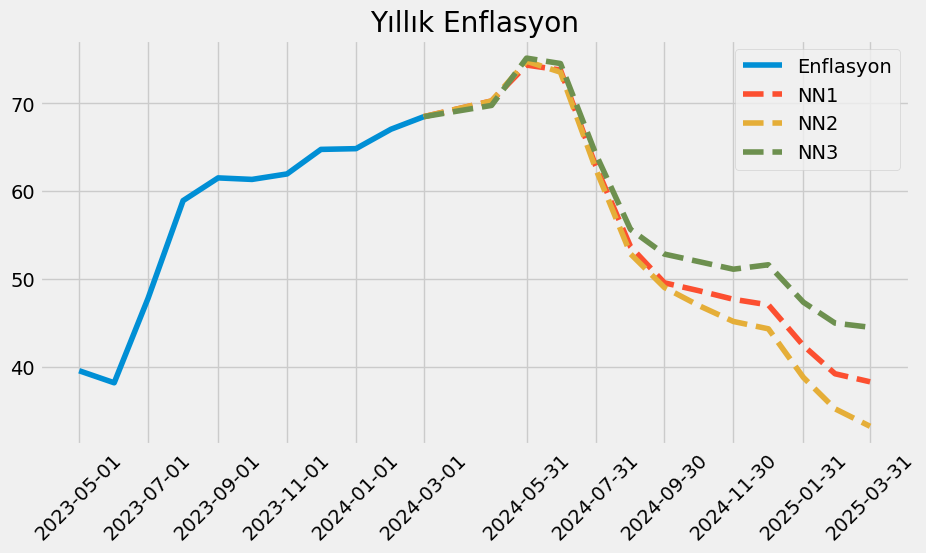

In [281]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["NN1"]=tüfetahmin13["CPI"]
yıllıktahmin["NN2"]=tüfetahmin14["CPI"]
yıllıktahmin["NN3"]=tüfetahmin15["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["NN1"].iloc[23:-2],'--',label="NN1")
plt.plot(yıllıktahmin["NN2"].iloc[23:-2],'--',label="NN2")
plt.plot(yıllıktahmin["NN3"].iloc[23:-2],'--',label="NN3")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[13:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [282]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,NN1,NN2,NN3,Baz Senaryo,Maksimum,Minimum
2022-04-01,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-01,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-01,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-01,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-01,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-01,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-01,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-01,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-01,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597
2023-01-01,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481


In [295]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN1','NN2','NN3', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN1','NN2','NN3', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [284]:
sonu2023=str(yıllıktahmin.iloc[20,0])[:5]
tepe=str(yıllıktahmin.iloc[-13,0])[:5]
sonu2024=str(yıllıktahmin.iloc[-6,0])[:5]
max=str(yıllıktahmin.iloc[-6,0])[:5]
min=str(yıllıktahmin.iloc[-6,0])[:5]


In [285]:
sonu12024=str(yıllıktahmin.iloc[-6,0])[:5]

In [286]:
min1=str(yıllıktahmin.iloc[-6,-1])[:2]
max1=str(yıllıktahmin.iloc[-6,-2])[:2]

In [287]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-04-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-4,44.16


In [293]:
yıllıktahmin.index[11:-1:2]

DatetimeIndex(['2023-03-01', '2023-05-01', '2023-07-01', '2023-09-01',
               '2023-11-01', '2024-01-01', '2024-03-01', '2024-05-31',
               '2024-07-31', '2024-09-30', '2024-11-30', '2025-01-31',
               '2025-03-31'],
              dtype='datetime64[ns]', freq=None)

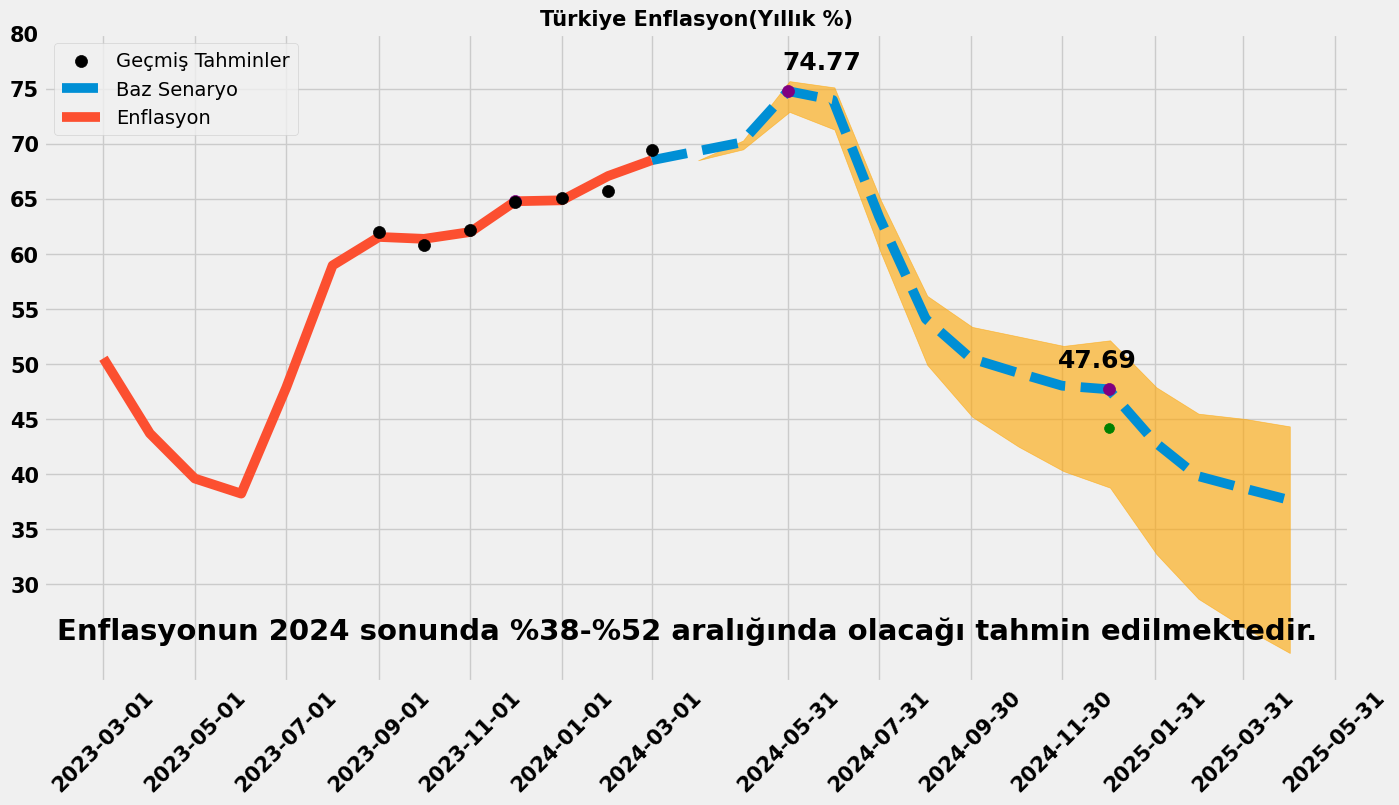

In [294]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[17:24],y=[61.94,60.84,62.13,64.71,65.06,65.73,69.47],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[20],y=yıllıktahmin.iloc[20,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[25],y=yıllıktahmin.iloc[25,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[32],y=yıllıktahmin.iloc[32,0],color='purple',zorder=3,s=75)
"""plt.scatter(x=yıllıktahmin.index[34],y=yıllıktahmin.iloc[34,-3],color='blue',zorder=3,s=75)"""
plt.plot(yıllıktahmin["Ortalama"].iloc[23:-1],'--',label="Baz Senaryo",linewidth=7)
"""plt.plot(yıllıktahmin["İyimser Senaryo Ortalama"].iloc[24:-1],'--',label="İyimser Senaryo",linewidth=7)"""
plt.plot(yıllıktahmin["Ortalama"].iloc[11:24],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[23:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[23:].shift(1), yıllıktahmin["Minimum"].iloc[23:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-05')
plt.text(mdates.datestr2num('2024-07'), float(tepe)+2, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
"""plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')"""
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 25, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11::2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03')])

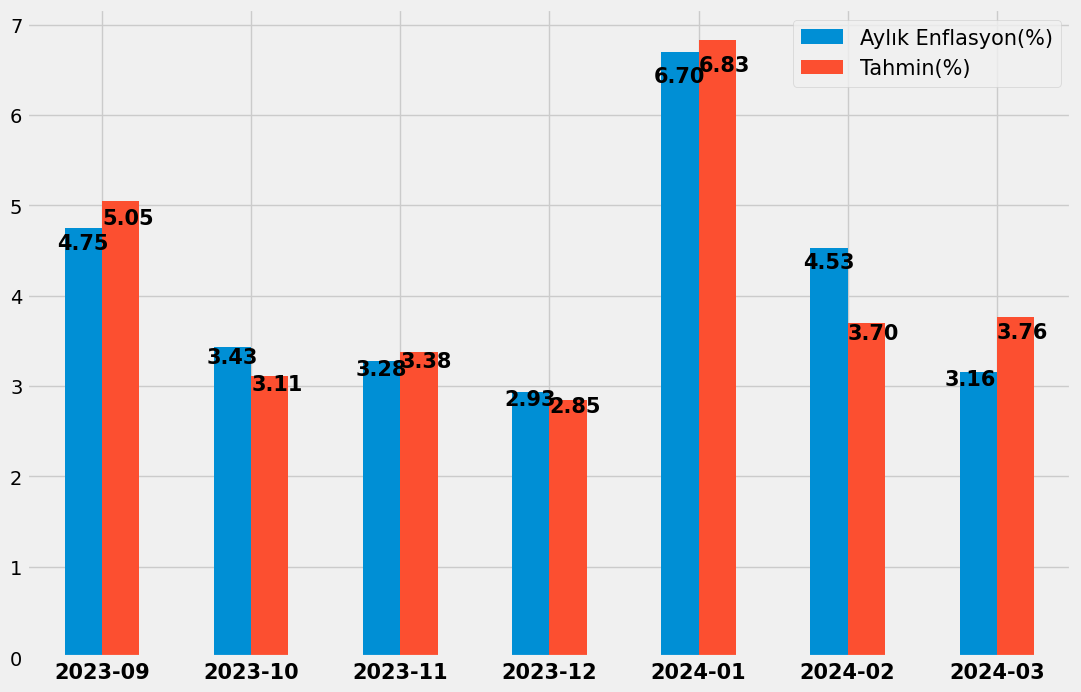

In [289]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=7,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.80),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.94),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [290]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


KeyError: '2023-12-31'

Text(8.75, 3.0670476439141123, '3.22')

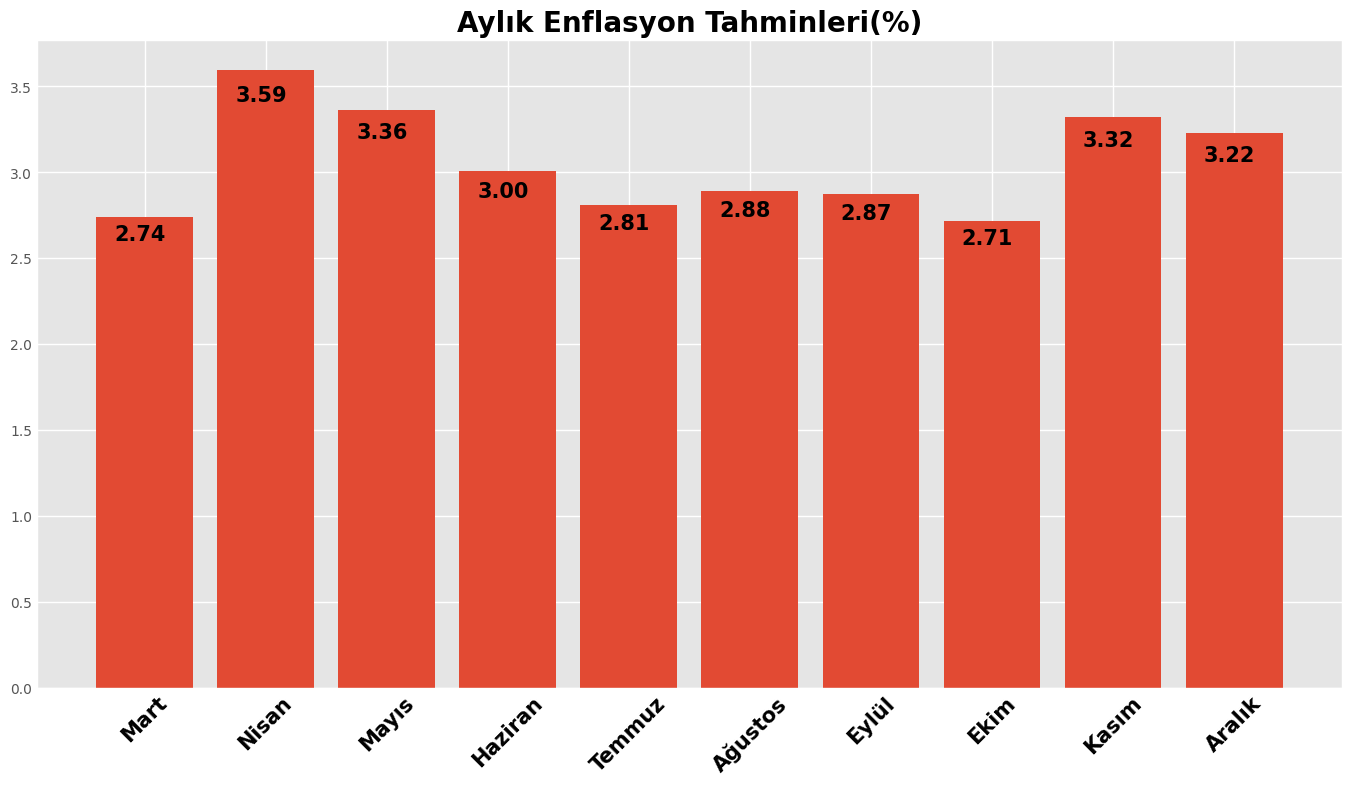

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x=["Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-4,-1])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)



In [ ]:
import pandas as pd
data=pd.read_excel('data.xlsx')
data=data.set_index(pd.to_datetime(data["Tarih"]))
del data["Tarih"]
tahmindf=pd.read_excel("tahmin.xlsx")
tahmindf=tahmindf.set_index(pd.to_datetime(tahmindf["Unnamed: 0"]))
del tahmindf["Unnamed: 0"]
tahmindf.index.name="Tarih"
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,TÜFE Lag
Tarih,,,,,,,,,,,,,,
2024-04-30,2.046059,0.000000,0,3.321453,2.406007,2.697668,5.285398,3.773649,54.976854,-0.669130,-1.631858,9.212634,50.190000,3.162671
2024-05-31,1.565047,5.592520,0,3.134249,5.405275,3.489355,4.347335,3.954864,55.771540,-1.486454,-0.994288,9.235127,52.367379,0.000000
2024-06-30,2.400245,6.325329,0,3.160474,4.248715,3.308074,4.369817,2.320101,57.929705,0.956468,-0.367443,9.228195,53.431814,0.000000
2024-07-31,2.369742,0.976442,0,3.107067,2.800296,2.451112,2.910647,1.794376,57.254403,2.243914,0.717971,9.239016,54.284130,0.000000
2024-08-31,2.314885,3.978149,0,3.052094,3.213627,1.903793,3.649570,1.436075,57.747456,0.643143,-1.083233,9.244037,54.966597,0.000000
2024-09-30,2.262511,0.304067,0,2.786711,1.742780,1.713243,3.316311,1.361371,58.889141,0.999985,-0.486992,9.242032,55.513062,0.000000
2024-10-31,2.212454,2.183153,0,2.374110,3.645297,0.540882,3.009125,1.413098,58.582898,1.471411,-0.537574,9.244381,55.950628,0.000000
2024-11-30,2.141036,-0.989621,0,2.099454,3.797344,1.617682,3.147249,1.438224,59.012598,1.736421,0.733958,9.245382,56.300996,0.000000
2024-12-31,2.119191,3.398581,0,2.380430,2.660219,1.650221,3.250372,1.390771,59.652610,0.437801,-1.301467,9.244728,56.581542,0.000000


In [ ]:
from pycaret.regression import *
s = setup(data.drop(['TÜFE Lag','M3','REDKT','Mevduat Faizi'],axis=1).iloc[:-12], target = 'TÜFE', session_id = 123,index=False,normalize=False,fold=10,train_size=0.9,test_data=data.iloc[-12:,:].drop(['TÜFE Lag','M3','REDKT','Mevduat Faizi'],axis=1),feature_selection=True,n_features_to_select=10)
best = compare_models(sort="RMSE")
huber = create_model('huber', return_train_score=False,cross_validation=False)
en = create_model('en', return_train_score=False,cross_validation=False)
br = create_model('br', return_train_score=False,cross_validation=False)
ridge = create_model('ridge', return_train_score=False,cross_validation=False)
lr = create_model('lr', return_train_score=False,cross_validation=False)
lar = create_model('lar', return_train_score=False,cross_validation=False)
features=huber.feature_names_in_
huber.fit(data[features],data["TÜFE"])
en.fit(data[features],data["TÜFE"])
br.fit(data[features],data["TÜFE"])
ridge.fit(data[features],data["TÜFE"])
lr.fit(data[features],data["TÜFE"])
lar.fit(data[features],data["TÜFE"])
huberpred=huber.predict(tahmindf[features])
enpred=en.predict(tahmindf[features])
brpred=br.predict(tahmindf[features])
ridgepred=ridge.predict(tahmindf[features])
lrrpred=lr.predict(tahmindf[features])
larpred=lar.predict(tahmindf[features])

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
features1=['USD/TL', 'Motorin', 'ParaArzi',
       'Borç', 'REDK',  'Politika Faizi','TÜFE Lag']

In [ ]:
huber.fit(data[features],data["TÜFE"])
en.fit(data[features],data["TÜFE"])
br.fit(data[features],data["TÜFE"])
ridge.fit(data[features],data["TÜFE"])
lr.fit(data[features],data["TÜFE"])
lar.fit(data[features],data["TÜFE"])
huberpred=huber.predict(tahmindf[features])
enpred=en.predict(tahmindf[features])
brpred=br.predict(tahmindf[features])
ridgepred=ridge.predict(tahmindf[features])
lrrpred=lr.predict(tahmindf[features])
larpred=lar.predict(tahmindf[features])

In [ ]:
(huberpred+enpred+brpred+ridgepred+lrrpred+larpred)/6

array([3.28999918, 4.16746683, 4.37258329, 3.69578702, 3.99640307,
       3.42763332, 3.78712153, 3.54802436, 3.73267157, 5.57775217,
       3.52201586, 3.63003264, 3.89701475, 3.72221252])